In [3]:
from src.data.loaders import load_data_astrospec,load_data
import tensorflow as tf
import numpy as np
from src.models.astromer_1 import get_ASTROMER
from src.training.utils import train
from src.models.astromer_1 import train_step,test_step

ImportError: cannot import name 'load_data' from 'src.data.loaders' (/Users/yashsurange/Documents/GitHub/astromer/src/data/loaders.py)

In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import time
start=time.time()
data_object=load_data_astrospec('/Users/yashsurange/Documents/GitHub/astromer/spectral_3000/train',batch_size=2,no_of_observations=500,non_exclusive_fraction=0.65,exclusive_fraction=0.7,iqr_threshold=1.2,sampling=True,off_nsp=True,test_mode=False)
end=time.time()
print(end-start)

[INFO] Sampling random windows
0.5906577110290527


In [2]:
testing_loader=load_data('/Users/yashsurange/Documents/GitHub/astromer/spectral_3000/train', 
              batch_size=2, 
              probed=0.4, 
              random_same=0.2, 
              window_size=10, 
              nsp_prob=.5, 
              repeat=1, 
              sampling=False, 
              shuffle=False,
              njobs=None,
              num_cls=None,
              test_mode=False,
              off_nsp=True)

2023-11-09 15:20:17.758022: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-09 15:20:17.758493: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [20]:
actual_first={}
actual_second={}
for i,j in testing_loader:
    actual_first=i
    actual_second=j
    break

In [21]:
actual_first.keys(),actual_second.keys()

(dict_keys(['magnitudes', 'times', 'att_mask']),
 dict_keys(['magnitudes', 'probed_mask']))

In [28]:
actual_second['probed_mask'].shape

TensorShape([2, 1000, 1])

In [6]:
first_dict={}
second_dict={}
for i,j in data_object:
    first_dict=i
    second_dict=j
    break

In [34]:
train_loader = load_data_astrospec('/Users/yashsurange/Documents/GitHub/astromer/spectral_3000/train', 
							 batch_size=100,# if opt.debug else opt.bs, 
							 no_of_observations=500,
							 non_exclusive_fraction=0.3,
							 exclusive_fraction=0.3,
							 iqr_threshold=0.2,
							 random_fraction=0.2,
							 same_fraction=0.2,
							 off_nsp=True,  
							 repeat=4, 
							 sampling=True)

[INFO] Sampling random windows
ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/Users/yashsurange/tensorflow-test/env/lib/python3.10/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2762, in while_loop
    loop_vars = body(*loop_vars)  File "/Users/yashsurange/tensorflow-test/env/lib/python3.10/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2753, in <lambda>
    body = lambda i, lv: (i + 1, orig_body(*lv))  File "/Users/yashsurange/tensorflow-test/env/lib/python3.10/site-packages/tensorflow/python/ops/map_fn.py", line 496, in compute
    return (i + 1, tas)  File "/Users/yashsurange/tensorflow-test/env/lib/python3.10/site-packages/tensorflow/python/ops/map_fn.py", line 493, in <listcomp>
    tas = [  File "/Users/yashsurange/tensorflow-test/env/lib/python3.10/sit

In [35]:
val_loader = load_data_astrospec('/Users/yashsurange/Documents/GitHub/astromer/spectral_3000/val', 
							 batch_size=100,# if opt.debug else opt.bs, 
							 no_of_observations=500,
							 non_exclusive_fraction=0.3,
							 exclusive_fraction=0.3,
							 iqr_threshold=0.2,
							 random_fraction=0.2,
							 same_fraction=0.2,
							 off_nsp=True,  
							 repeat=4, 
							 sampling=False)

In [36]:
model=get_ASTROMER(num_layers=2,
				 num_heads=2,
				 head_dim=64,
				 mixer_size=256,
				 dropout=0.1,
				 pe_base=1000,
				 pe_dim=128,
				 pe_c=1,
				 window_size=500,
				 batch_size=None,
				 encoder_mode='normal',
				 astrospec_skip=True,
				 average_layers=False)

In [37]:
train(model, 
		  train_loader, 
		  val_loader, 
		  num_epochs=1, 
		  lr=1e-3, 
		  test_loader=None, 
		  project_path='test_run/', 
		  debug=False, 
		  patience=20,
		  train_step_fn=train_step,
		  test_step_fn=test_step,
		  argparse_dict=None)

[INFO] Logs: test_run/logs


  0%|          | 0/1 [00:00<?, ?it/s]2023-11-09 15:29:10.615063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-09 15:29:10.899303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


  0%|          | 0/1 [02:38<?, ?it/s]


KeyboardInterrupt: 

In [29]:
second_dict['probed_mask'].shape

TensorShape([2, 500, 1])

In [8]:
second_dict.keys()

dict_keys(['magnitudes', 'probed_mask'])

In [33]:
tt=tf.reshape(tf.constant([1,2,3,4]),(4,1))

In [34]:
tt

<tf.Tensor: shape=(4, 1), dtype=int32, numpy=
array([[1],
       [2],
       [3],
       [4]], dtype=int32)>

In [38]:
tt=tf.convert_to_tensor(np.array([[1,2],
         [3,4],
         [5,6]]))

In [48]:
tf.concat([tt,1-mask_fill],0)

<tf.Tensor: shape=(5, 2), dtype=int64, numpy=
array([[1, 2],
       [3, 4],
       [5, 6],
       [0, 0],
       [0, 0]])>

In [4]:
testing_moving_median=0
for i in data_object:
    testing_moving_median=i
    break

2023-09-23 17:42:51.275311: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [5]:
testing_moving_median[0].keys()

dict_keys(['magnitudes', 'times', 'att_mask', 'original', 'mask'])

In [7]:
testing_moving_median[0]['original'].shape
# testing_moving_median[0]['mask'].shape

TensorShape([2, 50, 2])

In [6]:
testing_moving_median[1].keys()

dict_keys(['magnitudes', 'probed_mask'])

In [6]:
testing_moving_median[1]['magnitudes'].shape


TensorShape([2, 50, 1])

In [7]:
testing_moving_median[1]['probed_mask'].shape

TensorShape([2, 50, 1])

In [10]:
testing_moving_median[0]['times'].shape


TensorShape([2, 50, 1])

In [11]:
testing_moving_median[0]['att_mask'].shape

TensorShape([2, 50, 1])

In [17]:
tf.expand_dims(testing_moving_median['mask'],-1)

<tf.Tensor: shape=(2, 50, 1, 1), dtype=float32, numpy=
array([[[[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]]],


       [[[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        

In [15]:
tf.slice(testing_moving_median['input'],[0,0,2],[-1,-1,1])

InvalidArgumentError: {{function_node __wrapped__Slice_device_/job:localhost/replica:0/task:0/device:GPU:0}} Expected size[2] in [0, 0], but got 1 [Op:Slice]

In [29]:
mask_fill

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [45]:
mask_fill = tf.ones([5 - 3, 2], dtype=tf.int64)
# tf.concat([testing_moving_median['input'][:3],mask_fill],0)

In [46]:
mask_fill

<tf.Tensor: shape=(2, 2), dtype=int64, numpy=
array([[1, 1],
       [1, 1]])>

In [15]:
if tf.shape(testing_moving_median['input'])[0]>20:
    print(1)

1


In [16]:
testing_moving_median.keys()

dict_keys(['input', 'moving_median_sequence', 'original', 'lcid', 'length', 'mask', 'label', 'probed_mask', 'att_mask'])

In [9]:
reshaped=tf.reshape(testing_moving_median['probed_mask'],[50,1])

In [32]:
reshaped

<tf.Tensor: shape=(50, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [16]:
testing_moving_median['probed_mask']

<tf.Tensor: shape=(50, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [10]:
tf.multiply(testing_moving_median['input'],reshaped)

<tf.Tensor: shape=(50, 2), dtype=float32, numpy=
array([[ -0.        ,  -0.        ],
       [ -0.        ,  -0.        ],
       [ -0.        ,  -0.        ],
       [ -0.        ,  -0.        ],
       [-19.905762  ,   1.0902777 ],
       [-18.938965  ,   0.81722116],
       [ -0.        ,   0.        ],
       [ -0.        ,   0.        ],
       [ -0.        ,   0.        ],
       [ -0.        ,   0.        ],
       [ -0.        ,  -0.        ],
       [ -0.        ,   0.        ],
       [-12.158203  ,   0.09016132],
       [-11.189941  ,   0.11308146],
       [-10.21875   ,   0.47680283],
       [ -0.        ,  -0.        ],
       [ -0.        ,  -0.        ],
       [ -0.        ,   0.        ],
       [ -0.        ,   0.        ],
       [ -0.        ,   0.        ],
       [ -0.        ,  -0.        ],
       [ -0.        ,   0.        ],
       [ -2.4536133 ,  -0.66094613],
       [ -1.4804688 ,  -0.5366204 ],
       [ -0.        ,  -0.        ],
       [  0.4638672 ,   0.

In [7]:
from src.data.preprocessing import calculate_iqr

In [22]:
from src.data.masking import get_probed_astrospec

get_probed_astrospec(testing_moving_median,0.7,0.65,1.5)#['probed_mask']

2023-09-22 22:01:11.110706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-22 22:01:11.220378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


{'input': <tf.Tensor: shape=(50, 2), dtype=float32, numpy=
 array([[-5.35732422e+01,  5.93668938e-01],
        [-5.13916016e+01, -9.38462257e-01],
        [-4.92148438e+01, -1.80243909e-01],
        [-4.70322266e+01,  4.24127221e-01],
        [-4.48544922e+01,  3.59065294e-01],
        [-4.26757812e+01,  8.65865946e-02],
        [-4.04921875e+01,  1.63667023e-01],
        [-3.83125000e+01,  6.51389599e-01],
        [-3.61279297e+01,  1.37776434e-01],
        [-3.39472656e+01, -2.55158472e+00],
        [-3.17617188e+01, -1.80136514e+00],
        [-2.95800781e+01,  2.86371589e-01],
        [-2.73984375e+01,  3.03279042e-01],
        [-2.52109375e+01,  4.98347759e-01],
        [-2.30283203e+01,  1.04109168e-01],
        [-2.08388672e+01,  5.43916821e-01],
        [-1.86552734e+01,  1.15712583e-01],
        [-1.64658203e+01, -1.83890641e-01],
        [-1.42812500e+01,  3.24962497e-01],
        [-1.20957031e+01, -9.27468538e-02],
        [-9.90429688e+00,  9.77913141e-01],
        [-7.71875

In [23]:
get_probed_astrospec(testing_moving_median,0.7,0.65,1.5)['probed_mask']

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.],
      dtype=float32)>

In [13]:
test_mask

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [10]:
are_equal = tf.reduce_all(tf.math.equal(get_probed_astrospec(testing_moving_median,0.7,0.65,1.5)['probed_mask'], test_mask))

In [11]:
are_equal

<tf.Tensor: shape=(), dtype=bool, numpy=False>

In [9]:
def mask_values_spectra(true_value_tensor,moving_median_tensor):

          # New masking strategy - mask lines and random points along the continuum
          tf.random.set_seed(42)
          steps = tf.shape(true_value_tensor)[0]
          indices = tf.range(steps)


          squeezed_true_value_tensor=tf.squeeze(true_value_tensor)
          squeezed_moving_median_tensor=tf.squeeze(moving_median_tensor)
        
          # mm_numpy=squeezed_moving_median_tensor.numpy()
          # q1=np.percentile(mm_numpy,25)
          # q3=np.percentile(mm_numpy,75)
          # iqr=q3-q1
          iqr=calculate_iqr(squeezed_moving_median_tensor)
          
        #   std=tf.math.reduce_std(squeezed_moving_median_tensor)

          masked_tensor_exclusive_emission=tf.cast(((squeezed_true_value_tensor)>(squeezed_moving_median_tensor+1.5*iqr)),tf.int32)
          masked_tensor_exclusive_absorption=tf.cast(((squeezed_true_value_tensor)<(squeezed_moving_median_tensor-1.5*iqr)),tf.int32)

          masked_tensor_exclusive=masked_tensor_exclusive_emission+masked_tensor_exclusive_absorption
          print(masked_tensor_exclusive)
        #   print(masked_tensor_exclusive_emission)
        #   print(masked_tensor_exclusive_absorption)


          ## For emission lines

          windows = tf.TensorArray(dtype=tf.int32, size=0, dynamic_size=True)
          start = 0
          size_window = 0

          for i in tf.range(tf.shape(masked_tensor_exclusive_emission)[0]):
              if masked_tensor_exclusive_emission[i] == 1:
                  if size_window == 0:
                      start = i
                  size_window += 1
              else:
                  if size_window > 1:
                      windows = windows.write(windows.size(), (start, size_window))
                  size_window = 0
          start_and_size=windows.stack()
          print(start_and_size)



          ## For absorption
          windows_absorption = tf.TensorArray(dtype=tf.int32, size=0, dynamic_size=True)
          start_ab = 0
          size_window_ab = 0

          for i in tf.range(tf.shape(masked_tensor_exclusive_absorption)[0]):
              if masked_tensor_exclusive_absorption[i] == 1:
                  if size_window_ab == 0:
                      start_ab = i
                  size_window_ab += 1
              else:
                  if size_window_ab > 1:
                      windows_absorption = windows_absorption.write(windows_absorption.size(), (start_ab, size_window_ab))
                  size_window_ab = 0

          start_and_size_ab=windows_absorption.stack()
          print(start_and_size_ab)


          final_start_size=tf.concat([start_and_size_ab,start_and_size],axis=0)
          print(final_start_size)
          

          num_rows=tf.cast(tf.multiply(tf.cast(tf.shape(final_start_size)[0], tf.float32), 0.7),tf.int32)
          print(num_rows)
          

          shuffled_tensor = tf.random.shuffle(final_start_size)
          
          selected_rows = tf.slice(shuffled_tensor, [0, 0], [num_rows, -1])
          print(selected_rows)
          final_mask=tf.zeros_like(masked_tensor_exclusive_emission)

          for k in tf.range(tf.shape(selected_rows)[0]):
            indices_selected=tf.range(selected_rows[k][0],selected_rows[k][0]+selected_rows[k][1])
            updates = tf.ones(selected_rows[k][1], dtype=masked_tensor_exclusive_emission.dtype)
            reshaped_indices=tf.reshape(indices_selected,[-1,1])
            final_mask = tf.tensor_scatter_nd_update(final_mask, reshaped_indices, updates)

          print(final_mask)


          # # continuum mask
          continuum_mask=tf.math.logical_not(tf.cast(masked_tensor_exclusive,tf.bool))
          continuum_mask=tf.cast(continuum_mask,tf.int32)
          print(continuum_mask)
          


          windows_continuum = tf.TensorArray(dtype=tf.int32, size=0, dynamic_size=True)
          start_continuum = 0
          size_window_continuum = 0

          for i in tf.range(tf.shape(masked_tensor_exclusive)[0]):
              if continuum_mask[i] == 1:
                  if size_window_continuum == 0:
                      start_continuum = i
                  size_window_continuum += 1
              else:
                  if size_window_continuum > 1:
                      windows_continuum = windows_continuum.write(windows_continuum.size(), (start_continuum, size_window_continuum))
                  size_window_continuum = 0

          start_and_size_continuum=windows_continuum.stack()
          print(start_and_size_continuum)
          num_rows_continuum=tf.cast(tf.multiply(tf.cast(tf.shape(start_and_size_continuum)[0], tf.float32), 0.65),tf.int32)
          print(num_rows_continuum)
          shuffled_tensor_continuum = tf.random.shuffle(start_and_size_continuum)
          
          selected_rows_continuum = tf.slice(shuffled_tensor_continuum, [0, 0], [num_rows_continuum, -1])
          print(selected_rows_continuum)
          final_mask_continuum=tf.zeros_like(masked_tensor_exclusive)


          for k in tf.range(tf.shape(selected_rows_continuum)[0]):

            indices_selected_continuum=tf.range(selected_rows_continuum[k][0],selected_rows_continuum[k][0]+selected_rows_continuum[k][1])
            updates_continuum = tf.ones(selected_rows_continuum[k][1], dtype=masked_tensor_exclusive.dtype)
            reshaped_indices_continuum=tf.reshape(indices_selected_continuum,[-1,1])
            final_mask_continuum = tf.tensor_scatter_nd_update(final_mask_continuum, reshaped_indices_continuum, updates_continuum)

          print(final_mask_continuum)

          final_mask=tf.cast(final_mask,dtype=tf.float32)
          final_mask_continuum=tf.cast(final_mask_continuum,dtype=tf.float32)

          return final_mask+final_mask_continuum


In [10]:
test_mask=mask_values_spectra(tf.slice(testing_moving_median['input'],[0,1],[-1,1]),tf.slice(testing_moving_median['moving_median_sequence'],[0,1],[-1,1]))

tf.Tensor(
[1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0
 0 0 1 1 0 1 1 1 1 0 0 1 1], shape=(50,), dtype=int32)
tf.Tensor(
[[ 3  2]
 [ 6  2]
 [11  3]
 [20  3]
 [32  2]
 [39  2]
 [42  2]], shape=(7, 2), dtype=int32)
tf.Tensor(
[[ 1  2]
 [ 9  2]
 [28  2]
 [44  2]], shape=(4, 2), dtype=int32)
tf.Tensor(
[[ 1  2]
 [ 9  2]
 [28  2]
 [44  2]
 [ 3  2]
 [ 6  2]
 [11  3]
 [20  3]
 [32  2]
 [39  2]
 [42  2]], shape=(11, 2), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(
[[44  2]
 [42  2]
 [ 9  2]
 [ 6  2]
 [ 1  2]
 [20  3]
 [39  2]], shape=(7, 2), dtype=int32)
tf.Tensor(
[0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 1 1 1 0 0 0 0], shape=(50,), dtype=int32)
tf.Tensor(
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1
 1 1 0 0 1 0 0 0 0 1 1 0 0], shape=(50,), dtype=int32)
tf.Tensor(
[[25  2]
 [34  5]
 [46  2]], shape=(3, 2), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([[46  

In [11]:
test_mask

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
      dtype=float32)>

In [24]:
def get_probed(input_dict, probed, njobs):

    input_shape = tf.shape(input_dict['input'])

    if probed == 1.:
        probed_mask = tf.ones([input_shape[0], input_shape[1]]) * input_dict['mask']
        input_dict['probed_mask']  = probed_mask
        input_dict['att_mask'] = 1. - probed_mask
        return input_dict

    nprobed = tf.multiply(tf.cast(input_shape[1], tf.float32), probed)
    nprobed = tf.cast(nprobed, tf.int32)
    random_integers = tf.range(input_shape[1], dtype=tf.int32)
    indices = tf.map_fn(lambda x: tf.random.shuffle(random_integers), 
                                      tf.range(input_shape[0]),
                                      parallel_iterations=njobs)
    indices = tf.slice(indices, [0, 0], [-1, nprobed])
    random_mask = tf.one_hot(indices, input_shape[1])
    random_mask = tf.reduce_sum(random_mask, 1)

    input_dict['probed_mask'] = random_mask * input_dict['mask']
    att_mask = (1 - input_dict['mask']) + random_mask 
    att_mask = tf.minimum(att_mask, 1)
    input_dict['att_mask'] = att_mask

    return input_dict

In [ ]:
def add_random(input_dict, random_frac, njobs):
    """ Add random observations to each sequence
        
    Args:
        random_frac (number): Fraction of probed (in decimal) to be replaced with random values
    """ 
    input_shape = tf.shape(input_dict['input'])
    input_dict['input_pre_nsp'] = input_dict['input'] 

    # ====== RANDOM MASK =====
    n_probed = tf.reduce_sum(input_dict['probed_mask'], 1)
    n_random = tf.math.ceil(n_probed * random_frac)
    n_random = tf.cast(n_random, tf.int32)
    random_mask = tf.map_fn(lambda x: create_mask(x[0], x[1]),
                                (input_dict['probed_mask'], n_random),
                                parallel_iterations=njobs,
                                fn_output_signature=tf.int32)

    # ====== SAME MASK =====
    rest = tf.cast(input_dict['probed_mask'], tf.int32) * (1-random_mask)
    n_rest = tf.reduce_sum(rest, 1)
    n_same = tf.math.ceil(tf.cast(n_rest, tf.float32) * random_frac)
    n_same = tf.cast(n_same, tf.int32)

    same_mask = tf.map_fn(lambda x: create_mask(x[0], x[1]), 
                                  (rest, n_same),
                                  parallel_iterations=njobs,
                                  fn_output_signature=tf.int32)

    # ===== REPLACEMENT ==== 
    random_replacement = tf.random.shuffle(tf.transpose(input_dict['input'], [1, 0, 2]))
    random_replacement = tf.transpose(random_replacement, [1, 0, 2])
    random_replacement = random_replacement * tf.cast(tf.expand_dims(random_mask, -1), tf.float32) * [0., 1., 1.]

    # Mask refering to observations that do not change
    keep_mask = tf.expand_dims(1 - random_mask, -1)
    keep_mask = tf.tile(keep_mask, [1, 1, input_shape[-1]-1])
    keep_mask = tf.concat([tf.zeros([input_shape[0], input_shape[1], 1], dtype=tf.int32), keep_mask], 2)
    keep_mask = tf.abs([1, 0, 0] - keep_mask)

    # Part of the input we mantain
    keep_input = input_dict['input'] * tf.cast(keep_mask, tf.float32)

    # Replacing original input with the randomized one
    input_dict['input']  = random_replacement + keep_input

    # Attention mask is 1 when masked. 
    # Random mask is 1 for masked observations selected to be randomized
    # then,
    att_mask    = tf.cast(input_dict['att_mask'], tf.bool)
    random_mask = tf.cast(random_mask, tf.bool)
    same_mask   = tf.cast(same_mask, tf.bool)

    att_mask = tf.math.logical_xor(att_mask, random_mask)
    att_mask = tf.math.logical_xor(att_mask, same_mask)

    input_dict['att_mask'] = tf.cast(att_mask, tf.float32)

    return input_dict

In [2]:
tf.__version__

'2.10.0'

In [ ]:
wget --header="Host: drive.usercontent.google.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Cookie: HSID=A9-4Be5S4KsUsdxqy; SSID=AYL8vle_ve0RdEA1O; APISID=7AiM64vCKtMsidKG/AZJ49XCLp4dWeDZtB; SAPISID=KavZdosidfrQ4u7Q/AK_t6xvsGFl1gm6vm; __Secure-1PAPISID=KavZdosidfrQ4u7Q/AK_t6xvsGFl1gm6vm; __Secure-3PAPISID=KavZdosidfrQ4u7Q/AK_t6xvsGFl1gm6vm; S=billing-ui-v3=HyG4c8mWRw_IhakKY38rrkjQyxHFLhk0:billing-ui-v3-efe=HyG4c8mWRw_IhakKY38rrkjQyxHFLhk0; OGPC=19039026-1:; OGP=-19039026:; SEARCH_SAMESITE=CgQIx5kB; SID=cwjxU92iJUT8tntAsvftva6tgx0zVSFtX43LT6CWTmv-jc-onxnwfKZri1ygFIP3i53cPA.; __Secure-1PSID=cwjxU92iJUT8tntAsvftva6tgx0zVSFtX43LT6CWTmv-jc-oVcrtMJHdXlYhUHEQPaQVpw.; __Secure-3PSID=cwjxU92iJUT8tntAsvftva6tgx0zVSFtX43LT6CWTmv-jc-oWahEUYOaxmG95323BVNBmw.; AEC=Ackid1S4P10ZCZ9qzWUwxTuLosuQRLPhbrwXhJTjVt_nFyWAqjjIK5NPzw; 1P_JAR=2023-11-09-05; NID=511=MpvDURwxE_bg90BeLWvMWQ295OQ1qqliK04WPEypJx6pAeqUNsNg_YYeov12cSYordh2xjcZdWjt902OPbTEnmEkJ_HUP3GdZiEuU_g2_J5GN1UuzmtuzlK9u8U9_9oamoOqtkQF7f8hzQuXT0sIDnuqLlF9V9DJ2oM22UJ3wOIhziQGQw78NyqcaSl_g6oeIxhmwgOgsUg4wl_y4bwkvorHgI_JRMybKgIggt-PRmQpY39zy75U7CgkH4DlWFS0NOQv4wK_7BFYBDTMjyk6EZ0e-KfG3o_9IgH962gAdz6WVSlz4nCRkCpHsFMZZ_rSbkIjk9KacFZFeRoqv9Wu21aCmQ_TGqdsVXAMxoBKZBYmiu6yYmHUk3xHJiPxj3WR--6Ge81aDsRb8mDofbN_NQwM_lEjLmDoI5Yoz1i0oEE5c9wkTraTkRReItsJDFsbal4QhebJbw; __Secure-1PSIDTS=sidts-CjEBNiGH7gPlEAmkpPmIJl_s7SnISLJIYyVA7aPjf8HbkrVWFzf0MLhnu6Old8_Re0BKEAA; __Secure-3PSIDTS=sidts-CjEBNiGH7gPlEAmkpPmIJl_s7SnISLJIYyVA7aPjf8HbkrVWFzf0MLhnu6Old8_Re0BKEAA; SIDCC=ACA-OxMxb2lA_WSSetEdeMiMDg4YVg-LHO8HnXwHckWwVEV9go4ryWpaCnUmUMQ45gjoX-focKSU; __Secure-1PSIDCC=ACA-OxNRPQRAIM3hyc1Mj5AhEOb7R9gAH_LzT1Rs7vuaXeH9pzqR_EH2NXZ48VuxrGzUBFYgY40; __Secure-3PSIDCC=ACA-OxPPpbl9n1nI2amrLcCc_pYfdKmU-T9IWhkgCD58c8Ke0UgmwE2fjcvcZopdv50ZZDd7rCM" --header="Connection: keep-alive" "https://drive.usercontent.google.com/download?id=1mX6wjGm3_XtHsn5ymcK92DZrwnJR_oz_&export=download&authuser=0&confirm=t&uuid=0ef79b19-1819-48b6-86e3-f2772ac4cd8e&at=APZUnTXVkMEO_JxB_s-uJgpE4vBy:1699511320888" -c -O 'spectral_15000.zip'

In [ ]:
spectral_15000

In [ ]:
python astromer/presentation/experiments/astromer_1/pretrain_astrospec.py --exp-name astrospec_pretrain --data spectral_15000 --gpu 0 --num-heads 2 --bs 500 --num_epochs 200 --no-of-observations 500 --astrospec_skip True

In [ ]:
python astromer/presentation/experiments/astromer_1/pretrain_astrospec.py --exp-name astrospec_pretrain --data spectral_15000 --gpu 0 --num-heads 2 --bs 700 --num_epochs 200 --no-of-observations 500 --astrospec_skip True

In [ ]:
scp -i ~/.ssh/my-key -r path_to_data/dir -p 17662 root@ssha.jarvislabs.ai:/home/user/

In [ ]:
python astromer/presentation/experiments/astromer_1/pretrain_astrospec.py --exp-name astrospec_pretrain --data spectral_15000 --checkpoint weights_folder --gpu 0 --num-heads 2 --bs 700 --num_epochs 200 --no-of-observations 500 --astrospec_skip True

In [ ]:
python astromer/presentation/experiments/astromer_1/pretrain_astrospec.py --exp-name astrospec_pretrain --data spectral_15000 --checkpoint weights_folder --gpu 0 --num-heads 4 --bs 700 --num_epochs 200 --no-of-observations 500 --astrospec_skip True

In [ ]:
python astromer/presentation/experiments/astromer_1/pretrain_astrospec.py --exp-name astrospec_pretrain --data spectral_15000 --gpu 0 --num-heads 4 --bs 700 --num_epochs 500 --no-of-observations 500 --patience 40 --lr 3e-3 --head-dim 128 --astrospec_skip True

In [ ]:
wget --header="Host: drive.usercontent.google.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Cookie: S=billing-ui-v3=HyG4c8mWRw_IhakKY38rrkjQyxHFLhk0:billing-ui-v3-efe=HyG4c8mWRw_IhakKY38rrkjQyxHFLhk0; SEARCH_SAMESITE=CgQIx5kB; SID=cwjxU8qa16rSlT1w54LNiy7tXMLUsF4TBuw1gnbXs8fZqpk_SGKRM0a_j2Fcg4mJ8amBEw.; __Secure-1PSID=cwjxU8qa16rSlT1w54LNiy7tXMLUsF4TBuw1gnbXs8fZqpk_l-kMcY48p50wBw1ymwxRNQ.; __Secure-3PSID=cwjxU8qa16rSlT1w54LNiy7tXMLUsF4TBuw1gnbXs8fZqpk_0DTyewcVDWH6gj54KW0htA.; HSID=AlgvHIhNUbBU6g2fo; SSID=APZ_GdIuR-9jf7eEP; APISID=rLMhXGOWZHVh-26F/AICcYr5nXq7Zo48Pd; __Secure-1PAPISID=gTlg92dXk4kCClNp/AVaZ7BK60qZJXzVMD; SAPISID=gTlg92dXk4kCClNp/AVaZ7BK60qZJXzVMD; __Secure-3PAPISID=gTlg92dXk4kCClNp/AVaZ7BK60qZJXzVMD; AEC=Ackid1SmN7TEdFza5iZllMxWqIMngNBfg_0y-qG3PwmCVVJxTfsF9kb-8g; __Secure-1PSIDTS=sidts-CjEBNiGH7r4xX8ZaVZvIhwEtmEdhdZ8sFjaoYhMfoCdSosBWmsZpQVoFkXVDPDXPMRjHEAA; __Secure-3PSIDTS=sidts-CjEBNiGH7r4xX8ZaVZvIhwEtmEdhdZ8sFjaoYhMfoCdSosBWmsZpQVoFkXVDPDXPMRjHEAA; 1P_JAR=2023-11-21-03; NID=511=szt7brvwdIV516gRJykOqvnyoAscCRIjzWdlsJUE0tbTkleCOFRps8lHUHfYwxoBT6VPMkGPFU3brUJ8upoRwIotfyyt7jJ-aQVayqfFr84J82NUlR2JJ433ZRa_59YWAI70NdeFAUNN_29fgaNt3dsxZU3doYBP6QpziQbRf-Ed2E5R7F_NNq_SRmmPtTTzuwi0lbaWkL9mlSLtc9DkTJUxlzdpE4f4bjxxBqcyJNGHvEzlsHN2YNDp4xjMe0Axge97-AkWeiaxsM9eGuefkBIFYGWYAQVyhFTXjjKrskZ8ZDLjMx8kLROrDxv0CcvwdujLB70iE6MUZJW8mZe3QAFMM0wfyLgR4T7Ic6D2WJrVm9BAwkT_Zr6gqIDcr-7nflb2vxQ6ApXAjvhSLpLPpt40zTwd-V0jPQNCidoSCfngZLqM2NkjIkKQE-IEuqAmzvBngo6yV8XolB1v6CnTkz8; SIDCC=ACA-OxNlDNT1_RYWG77eq8P_Ig3Y3tv18FWkI4pszmoiur7c-S743ApZVLhEYlj3nIOiHemDzOjB; __Secure-1PSIDCC=ACA-OxPf6fiUKl8lRxBJILDRbig5XgFWpL0zZMLblCq69M-d5nenDDML7omxR-h14ih_-mDih5w; __Secure-3PSIDCC=ACA-OxPYYYKBb67LpsemE_MUG6hneWLmlsTzX2BETp5Ls6mkpHYU2bVICsDnw-aZgphc_emnkiY" --header="Connection: keep-alive" "https://drive.usercontent.google.com/download?id=1mX6wjGm3_XtHsn5ymcK92DZrwnJR_oz_&export=download&authuser=0&confirm=t&uuid=49f6ba2b-f207-474e-8687-1cfefbbd2ef3&at=APZUnTWe6zTmyET8vpEbyD4VY0G2:1700536246869" -c -O 'spectral_15000.zip'

In [ ]:
wget --header="Host: doc-2s-0g-drive-data-export.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Cookie: AUTH_n8q3gok1ov2j73fnn1alvjk0oq4aprif_nonce=r2473pp7ctlps" --header="Connection: keep-alive" "https://doc-2s-0g-drive-data-export.googleusercontent.com/download/dtdfmbb7b7rnp8bv3eiqid44bul5lv9e/fg6icfp8cj5j55232ivg9ah92qrhtivm/1700541000000/d5900907-4e25-476b-8152-120ce70e548b/108643312785108651779/ADt3v-PSMR63bY633D8-PzaskDornmwqpwqRLigPKNXq2tgOCzj0hK9f8G5COuiZc_Wb3W73XSv89F8gxHgJWCdz1M-BQICbw41xnNntZ87YCXM6DtIh5968xTzQHb3v1jIqCccP9F1WvNEL7P92UcXAOj5F2bL29PCg5yr_RjQUGyQGWVUZNrNdyEy5qdOA2Mkjhoi_TFu0RWcfBV3l_PMXs_lrnQYS4jMLkeTHuvDYNnFmajATWxhG2dsk0i199W53T0uDWcsNs4b_oDr7zW7NcsPtZPDoebjbsnywun7mIDE7WIcaOWm7LOYjdn57AGosdf5HTxFD?authuser=0&nonce=r2473pp7ctlps&user=108643312785108651779&hash=v52tppmtl8n5uc8tumva9l43pf69kktn" -c -O 'tracking_data-20231121T043740Z-001.zip'

In [ ]:
{'batch_size': 64, 'dropout': 0.2, 'end_factor': 1e-06, 'hidden_size': 32, 'kernel_size': 60, 'learning_rate': 0.001, 'num_layers': 4, 'patience': 60, 'reduction_iterations': 90, 'weight_decay': 0.0003}
Training with hyperparameters: {'batch_size': 64, 'dropout': 0.2, 'end_factor': 1e-06, 'hidden_size': 32, 'kernel_size': 60, 'learning_rate': 0.001, 'num_layers': 4, 'patience': 60, 'reduction_iterations': 90, 'weight_decay': 0.001}
Initialize layer with nn.init.xavier_uniform_: Linear(in_features=1144, out_features=100, bias=True)

In [ ]:
trial 1: 
Best Hyperparameters: {'weight_decay': 0.001, 'patience': 60, 'num_layers': 3, 'learning_rate': 0.001, 'kernel_size': 20, 'hidden_size': 32, 'dropout': 0.4, 'batch_size': 64}
Best Validation Loss: 0.7698126037915548

In [ ]:
trial 2:
    

Best Hyperparameters: {'weight_decay': 0.01, 'patience': 60, 'num_layers': 4, 'learning_rate': 0.001, 'kernel_size': 60, 'hidden_size': 256, 'dropout': 0.4, 'batch_size': 64}
Best Validation Loss: 0.776667853196462

In [6]:
y=np.array([2,3,10,4,5])
x=np.arange(5)

In [7]:
y

array([ 2,  3, 10,  4,  5])

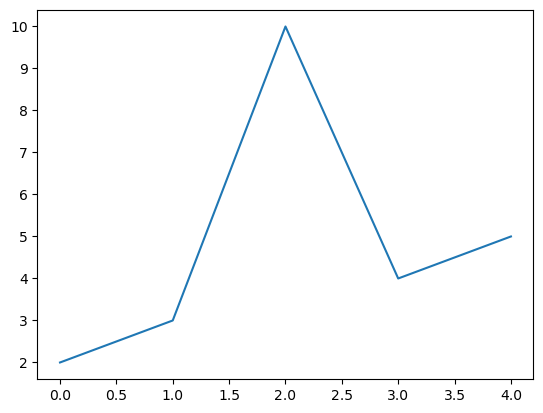

In [10]:
import matplotlib.pyplot as plt
plt.plot(x,y)

In [11]:
np.mean(y-np.mean(y))

1.7763568394002506e-16

In [12]:
np.mean(y)

4.8